# Sampling

For this assignment, I applied the topics of  undersampling, oversampling and SMOTE to a toy dataset to see if you get better performance by using these sampling methods. In my experience, sampling helps sometimes but not all times.

![picture](https://th.bing.com/th/id/R.38ed3c8ff436a29c0aa0d11ac2a8c9df?rik=AzMREUs53RgoGw&pid=ImgRaw&r=0)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.isna().sum() # Checked the dataset if there is any null values present

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

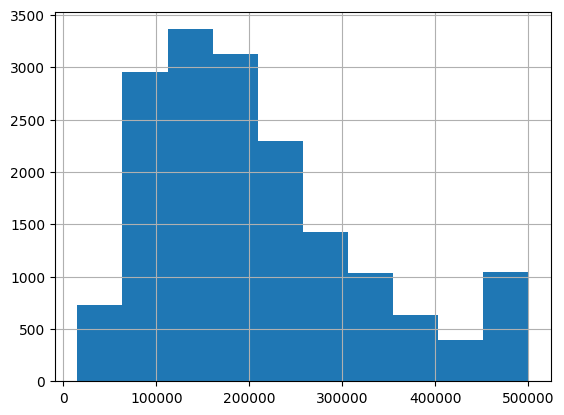

In [ ]:
import matplotlib.pyplot as plt

df['median_house_value'].hist()
plt.show()

In [ ]:
# create a new target variable for SMOTE
import numpy as np

# nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)
df['median_house_value'].value_counts()

1    15304
0     1696
Name: median_house_value, dtype: int64

# (5 pts) Split data into train and test
Remember, your dataset should be split into train and test FIRST so that the test dataset retains the original distribution of 0s and 1s. No SMOTE data in the test partition - your boss only cares about real rows!

In [ ]:
y = df['median_house_value'] # assign the 'median_house_value' column to variable y.
X = df.drop('median_house_value', axis=1) # assign all columns except 'median_house_value' to variable X.
print(X.shape, y.shape) # print the shapes of X and y.

(17000, 8) (17000,)


In [ ]:
X = np.array(X) #convert the X dataframe to a numpy array.
y = np.array(y) #convert the Y dataframe to a numpy array.

In [ ]:
from sklearn.model_selection import train_test_split #imported train-test_split from Sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3052984) # Split the dataset into train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # Print the dimensions of the train and test sets

(13600, 8) (3400, 8) (13600,) (3400,)


# (15 pts) Majority Undersampling
Perform majority undersampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [ ]:
# Imported libraries
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority') #randomly select  majority class to balance the class distribution.
X_under, y_under = undersample.fit_resample(X, y) #resample the dataset, creating new X_under and y_under variables
print(Counter(y_under)) # prints the no.of 0 & 1

Counter({0: 1696, 1: 1696})


In [ ]:
# Import DecisionTreeClassifier and required metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
# Split the undersampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=123)
# Define a Decision Tree Classifier with a minimum sample split of 10
DTC = DecisionTreeClassifier(min_samples_split=10)
#Fit the Decision Tree Classifier to the training set
DTC.fit(X_train, y_train)
# Making predictions on the train and test sets
train_preds = DTC.predict(X_train)
test_preds = DTC.predict(X_test)
# Print the confusion matrix and classification report for the train set
print('Train results: \n')
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
# Print the confusion matrix and classification report for the test set
print('Test results: \n')
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))

Train results: 

[[1297   60]
 [  70 1286]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1357
           1       0.96      0.95      0.95      1356

    accuracy                           0.95      2713
   macro avg       0.95      0.95      0.95      2713
weighted avg       0.95      0.95      0.95      2713

Test results: 

[[284  55]
 [ 55 285]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       339
           1       0.84      0.84      0.84       340

    accuracy                           0.84       679
   macro avg       0.84      0.84      0.84       679
weighted avg       0.84      0.84      0.84       679

Accuracy: 0.8379970544918999


# (15 pts) Minority Oversampling
Perform minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [ ]:
from imblearn.over_sampling import RandomOverSampler # Imported over sampler from imblearn

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority') #randomly select  minority class to balance the class distribution.
X_over, y_over = oversample.fit_resample(X, y)  #resample the dataset, creating new X_over and y_over variables
print(Counter(y_over)) # prints the count of no.of 0 & 1

Counter({1: 15304, 0: 15304})


In [ ]:
# Imported DTC classifier from sklearn tree and metrics to caluculate accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
# Split the X_over and y_over datasets into train and test
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=123)
# Created a DecisionTreeClassifier model with a min_samples_split
DTC = DecisionTreeClassifier(min_samples_split=10)
# fitted the data on train and test data sets
DTC.fit(X_train, y_train)
train_preds = DTC.predict(X_train)
test_preds = DTC.predict(X_test)
print('Train results: \n')
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
print('Test results: \n')
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))

Train results: 

[[12247     2]
 [   79 12158]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12249
           1       1.00      0.99      1.00     12237

    accuracy                           1.00     24486
   macro avg       1.00      1.00      1.00     24486
weighted avg       1.00      1.00      1.00     24486

Test results: 

[[3054    1]
 [ 180 2887]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3055
           1       1.00      0.94      0.97      3067

    accuracy                           0.97      6122
   macro avg       0.97      0.97      0.97      6122
weighted avg       0.97      0.97      0.97      6122

Accuracy: 0.9704344985298922


# (15 pts) SMOTE
Perform synthetic minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [ ]:
# Converted X & y into numpy arrays
X = np.array(X)
y = np.array(y)

In [ ]:
# Imported the required libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import NearestNeighbors
import random
from collections import Counter

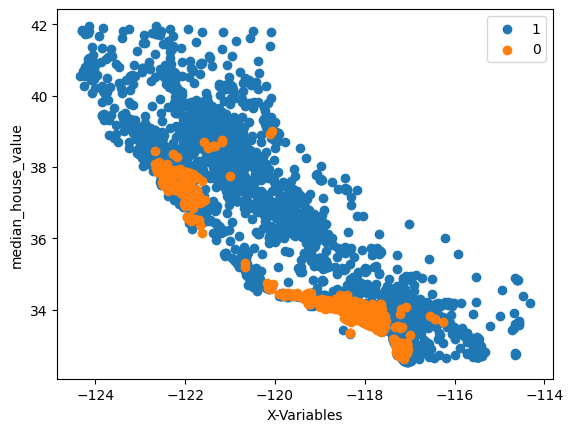

In [ ]:
# Scatter plot of the data before performing SMOTE
counter = Counter(y)
for label, _ in counter.items():
 row_ix = np.where(y == label)[0]
 plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.ylabel('median_house_value')
plt.xlabel('X-Variables')
plt.legend()
plt.show()

In [ ]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(13600, 8) (3400, 8)
(13600,) (3400,)


In [ ]:
Counter(y_train) # No. of 1 & 0 in y train

Counter({1: 12254, 0: 1346})

In [ ]:
Counter(y_test) # No. of 1 & 0 in y test

Counter({1: 3050, 0: 350})

In [ ]:
# Imported SMOTE & SVMSMOTE from imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# transform the dataset using SVMSMOTE(oversampling)
oversample = SVMSMOTE()
X_res, y_res = oversample.fit_resample(X_train, y_train) # Resampled data
counter = Counter(y_res)
print(counter) # Count of resampled data

Counter({1: 12254, 0: 12254})


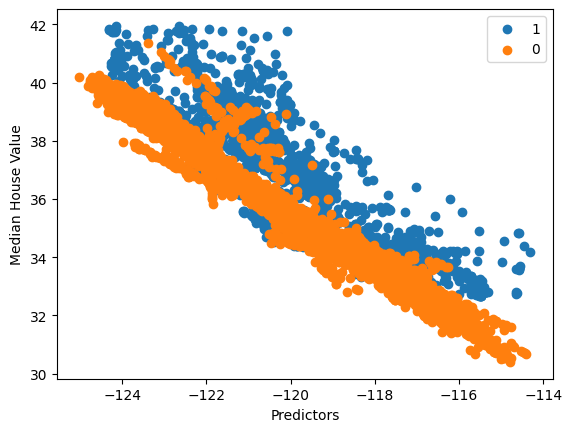

In [ ]:
# scatter plot of Resampled data after performing SVMSMOTE
for label, _ in counter.items():
 row_ix = np.where(y_res == label)[0]
 plt.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
plt.ylabel('Median House Value')
plt.xlabel('Predictors')
plt.legend()
plt.show()

In [ ]:
# Importing the DTC classifier with a minimum sample split of 10
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
DTC = DecisionTreeClassifier(min_samples_split=10)

## Results of the original Test and Train values


In [ ]:
# results of Original data before resampling(before performing SVMSMOTE)
DTC.fit(X_train, y_train)
train_preds = DTC.predict(X_train)
test_preds = DTC.predict(X_test)

print('Train results: \n')
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
print('Test results: \n')
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))

Train results: 

[[ 1201   145]
 [  161 12093]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1346
           1       0.99      0.99      0.99     12254

    accuracy                           0.98     13600
   macro avg       0.93      0.94      0.94     13600
weighted avg       0.98      0.98      0.98     13600

Test results: 

[[ 208  142]
 [ 140 2910]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       350
           1       0.95      0.95      0.95      3050

    accuracy                           0.92      3400
   macro avg       0.78      0.77      0.77      3400
weighted avg       0.92      0.92      0.92      3400

Accuracy: 0.9170588235294118


## Results of the Re-sampled data

In [ ]:
# results of resampled data (after performing SVMSMOTE)
DTC.fit(X_res, y_res)
train_preds = DTC.predict(X_res)
test_preds = DTC.predict(X_test)
print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12254
           1       0.98      0.98      0.98     12254

    accuracy                           0.98     24508
   macro avg       0.98      0.98      0.98     24508
weighted avg       0.98      0.98      0.98     24508

Test results: 

              precision    recall  f1-score   support

           0       0.50      0.73      0.59       350
           1       0.97      0.92      0.94      3050

    accuracy                           0.90      3400
   macro avg       0.73      0.82      0.77      3400
weighted avg       0.92      0.90      0.91      3400

Accuracy: 0.8976470588235295


# (5 pts) Comparison of 3 methods
Out of the three methods, did any do the best? Make a few comments about what you see.

## By comparing all three models the Minority oversampling is giving higher accuracy of 97% for the following California housing dataset with the best precision & Recall score. And the accuracy for Majority undersampling and SMOTE is 82% and 90%.

# (40 pts) Reproducibility - run it 30 times or more!
This is one is a little tougher - choose any method and replicate it at least 30 times using a for loop. This means you will split into train and test 30 times (which means you should choose a random_state equal to 'i' as your for loop spins.)

The purpose of this is so that you can show the distribution (hopefully a bell curve but not necessarily) of accuracy, precision and recall. Do some folds get predicted better than others?



In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X = np.array(X)
y = np.array(y)

accuracy = []
precision = []
recall = []

for i in range(30):
    # Split data into k folds
    kf = RepeatedKFold(n_splits=10,random_state=i)

    # Initialize lists to store evaluation metrics
    train_scores = []
    test_scores = []
    # Train and evaluate your model
    DTC = DecisionTreeClassifier(min_samples_split=10)
    DTC.fit(X_train, y_train)
    train_preds = DTC.predict(X_train)
    test_preds = DTC.predict(X_test)
    accuracyScore = accuracy_score(y_test, test_preds)
    precisionScore = precision_score(test_preds, y_test,average='weighted')
    recallScore = recall_score(y_test, test_preds, average='weighted')

    accuracy.append(accuracyScore)
    precision.append(precisionScore)
    recall.append(recallScore)


    # Prints accuracy scores i[of each iteration
    print(f"Iteration {i+1}:")
    print('Accuracy:', accuracyScore)
    print('Precision', precisionScore)
    print('Recall:',  recallScore)

Iteration 1:
Accuracy: 0.9191176470588235
Precision 0.9194287229645958
Recall: 0.9191176470588235
Iteration 2:
Accuracy: 0.918235294117647
Precision 0.9186563989530238
Recall: 0.918235294117647
Iteration 3:
Accuracy: 0.9179411764705883
Precision 0.918690549662488
Recall: 0.9179411764705883
Iteration 4:
Accuracy: 0.918235294117647
Precision 0.918030362308858
Recall: 0.918235294117647
Iteration 5:
Accuracy: 0.9167647058823529
Precision 0.9168704366992698
Recall: 0.9167647058823529
Iteration 6:
Accuracy: 0.9170588235294118
Precision 0.9170588235294118
Recall: 0.9170588235294118
Iteration 7:
Accuracy: 0.9176470588235294
Precision 0.9174406392065022
Recall: 0.9176470588235294
Iteration 8:
Accuracy: 0.9155882352941176
Precision 0.9150661936905911
Recall: 0.9155882352941176
Iteration 9:
Accuracy: 0.9176470588235294
Precision 0.9176470588235294
Recall: 0.9176470588235294
Iteration 10:
Accuracy: 0.918235294117647
Precision 0.918235294117647
Recall: 0.918235294117647
Iteration 11:
Accuracy: 0.91

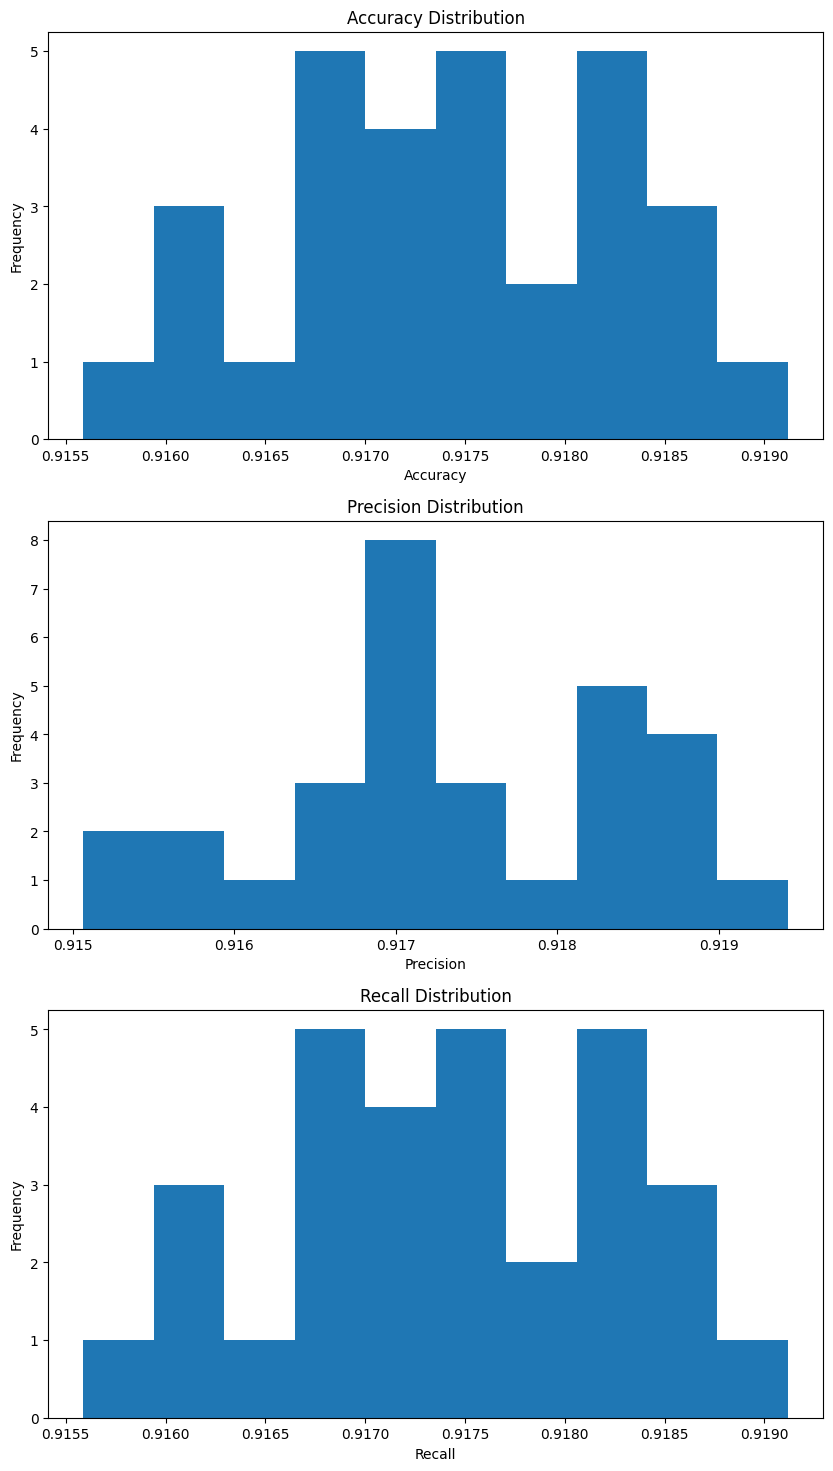

In [ ]:
# Plots of Accuracy, Precision & Recall
fig, axs = plt.subplots(3, figsize=(10, 18))

axs[0].hist(accuracy)
axs[0].set_title("Accuracy Distribution")
axs[0].set_xlabel("Accuracy")
axs[0].set_ylabel("Frequency")

axs[1].hist(precision)
axs[1].set_title("Precision Distribution")
axs[1].set_xlabel("Precision")
axs[1].set_ylabel("Frequency")

axs[2].hist(recall)
axs[2].set_title("Recall Distribution")
axs[2].set_xlabel("Recall")
axs[2].set_ylabel("Frequency")

plt.show()

# (5 pts) Comments on the repeated experiment


## Performing a test repeatedly using a for loop produces consistent results with 91% accuracy, along with a constant recall and precision score. However, as the number of iterations increases, the time taken to perform the code also increases due to the additional computational work required in each iteration.